In [26]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = [6.4, 4.8]
from datetime import datetime

In [27]:
data = pd.read_csv(r"C:/Users/Piyus/Desktop/Review 2/austin_water_residential_water_consumption_1.csv")
data.shape
print(data)

       year_month  postal_code            customer_class  total_gallons
0          201403        78702               Residential       23450100
1          201311        78746              Multi-Family       12801400
2          201704        78652              Multi-Family          58400
3          201302        78727  Irrigation - Residential           1800
4          201608        78726  Irrigation - Residential          82200
...           ...          ...                       ...            ...
13035      201801        78730               Residential       16359100
13036      201807        78748               Residential       83211800
13037      201401        78724               Residential       21972100
13038      201609        78759               Residential       76283600
13039      201609        78702              Multi-Family       11815500

[13040 rows x 4 columns]


In [28]:
data.style.hide_index()
data.head()

,year_month,postal_code,customer_class,total_gallons
0,201403,78702,Residential,23450100
1,201311,78746,Multi-Family,12801400
2,201704,78652,Multi-Family,58400
3,201302,78727,Irrigation - Residential,1800
4,201608,78726,Irrigation - Residential,82200


In [29]:
def timedate(x):
  x = str(x)
  x = x[0:4]+ str('-') + x[4:]+ str('-') + str('01')
  return x

data['year_month'] = data['year_month'].apply(lambda x: timedate(x))
data.head()

,year_month,postal_code,customer_class,total_gallons
0,2014-03-01,78702,Residential,23450100
1,2013-11-01,78746,Multi-Family,12801400
2,2017-04-01,78652,Multi-Family,58400
3,2013-02-01,78727,Irrigation - Residential,1800
4,2016-08-01,78726,Irrigation - Residential,82200


In [30]:
data['customer_class'].value_counts()

Residential                  3773
Multi-Family                 3402
Irrigation - Multi-Family    3024
Irrigation - Residential     2841
Name: customer_class, dtype: int64

In [31]:
Irrigation_MultiFamily = data[data["customer_class"] == "Irrigation - Multi-Family"]

In [32]:
d_imuf = Irrigation_MultiFamily.copy(deep = True)

In [33]:
d_imuf.head()

,year_month,postal_code,customer_class,total_gallons
5,2016-11-01,78729,Irrigation - Multi-Family,4852700
8,2012-08-01,78753,Irrigation - Multi-Family,8744100
10,2016-03-01,78752,Irrigation - Multi-Family,58400
11,2012-07-01,78749,Irrigation - Multi-Family,8506700
12,2012-07-01,78705,Irrigation - Multi-Family,623700


In [34]:
d_imuf = d_imuf.drop(['postal_code', 'customer_class'], axis = 1)

In [35]:
d_imuf.style.hide_index()

year_month,total_gallons
2016-11-01,4852700
2012-08-01,8744100
2016-03-01,58400
2012-07-01,8506700
2012-07-01,623700
2014-09-01,1243100
2014-01-01,386000
2012-03-01,125800
2013-04-01,728100
2015-06-01,522500


In [36]:
d_imuf.to_csv(r'C:/Users/Piyus/Desktop/Review 2/Irrigation-Multi-Family_dataset.csv', index = False)

In [63]:
# parsing string to a date time type
d_res['year_month']=pd.to_datetime(d_res['year_month'], infer_datetime_format=True)

In [95]:
# Plotting Graph
plt.figure(figsize=(20,10))
plt.xlabel("year_month")
plt.ylabel("total_gallon")
plt.plot(d_res)

ValueError: Date ordinal -6279470.0 converts to -15223-05-25T00:00:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

In [89]:
# Determining Rolling Statistics
rolmean=d_res.rolling(window=12).mean()
rolstd=d_res.rolling(window=12).std()
print(rolmean)
print(rolstd)

       total_gallons
0                NaN
7                NaN
9                NaN
20               NaN
26               NaN
...              ...
13032   2.839176e+07
13035   2.839528e+07
13036   3.522788e+07
13037   3.647947e+07
13038   4.278596e+07

[3773 rows x 1 columns]
       total_gallons
0                NaN
7                NaN
9                NaN
20               NaN
26               NaN
...              ...
13032   2.203627e+07
13035   2.203417e+07
13036   2.531029e+07
13037   2.412878e+07
13038   2.378761e+07

[3773 rows x 1 columns]


In [91]:
# plotting rolling stastics
plt.figure(figsize=(20,10))
original=plt.plot(d_res, color='blue', label='Original')
mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

ValueError: Date ordinal -6279470.0 converts to -15223-05-25T00:00:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

In [7]:
# Performing Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results For Dickey-Fuller Test: ')
dftest=adfuller(data['total gallons'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results For Dickey-Fuller Test: 
Test Statistic          -2.095007
p-value                  0.246527
Lags Used               11.000000
No. of Obs              69.000000
Critical Value (1%)     -3.528890
Critical Value (5%)     -2.904440
Critical Value (10%)    -2.589656
dtype: float64


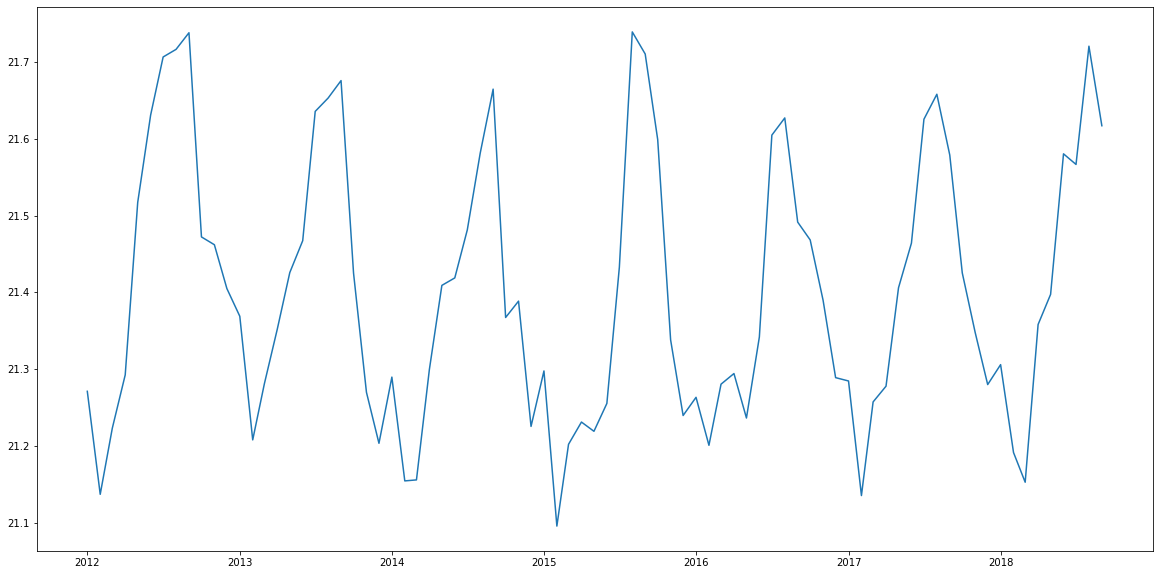

In [8]:
# Estimating Trends
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

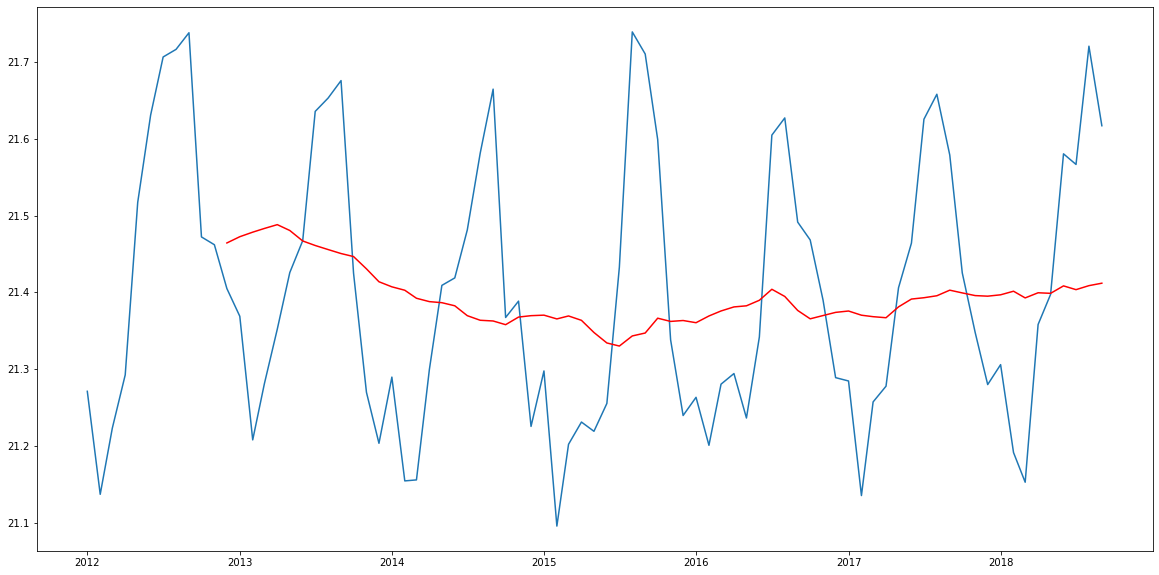

In [9]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='red')

In [10]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,total gallons
months,
2012-12-01,-0.059425
2013-01-01,-0.103688
2013-02-01,-0.270717
2013-03-01,-0.202372
2013-04-01,-0.136159


In [11]:
# ADCF Test
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='blue', label='original')
    mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['total gallons'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

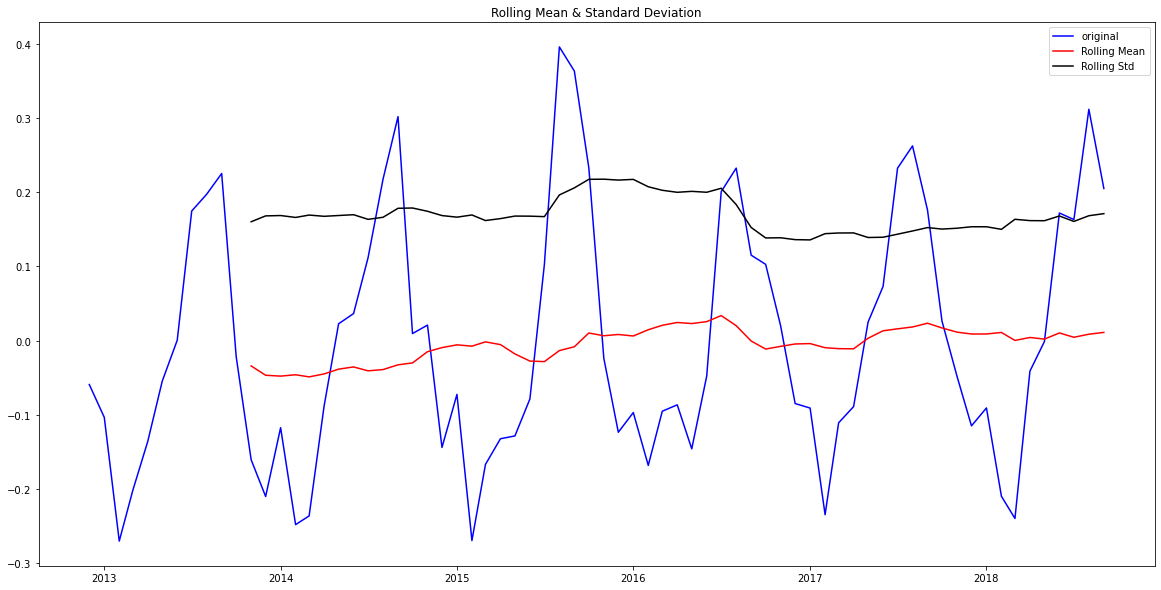

Dickey-Fuller Test: 
Test Statistic          -1.765561
p-value                  0.397689
Lags Used               11.000000
No. of Obs              58.000000
Critical Value (1%)     -3.548494
Critical Value (5%)     -2.912837
Critical Value (10%)    -2.594129
dtype: float64


In [12]:
stationarity(data_log_diff)

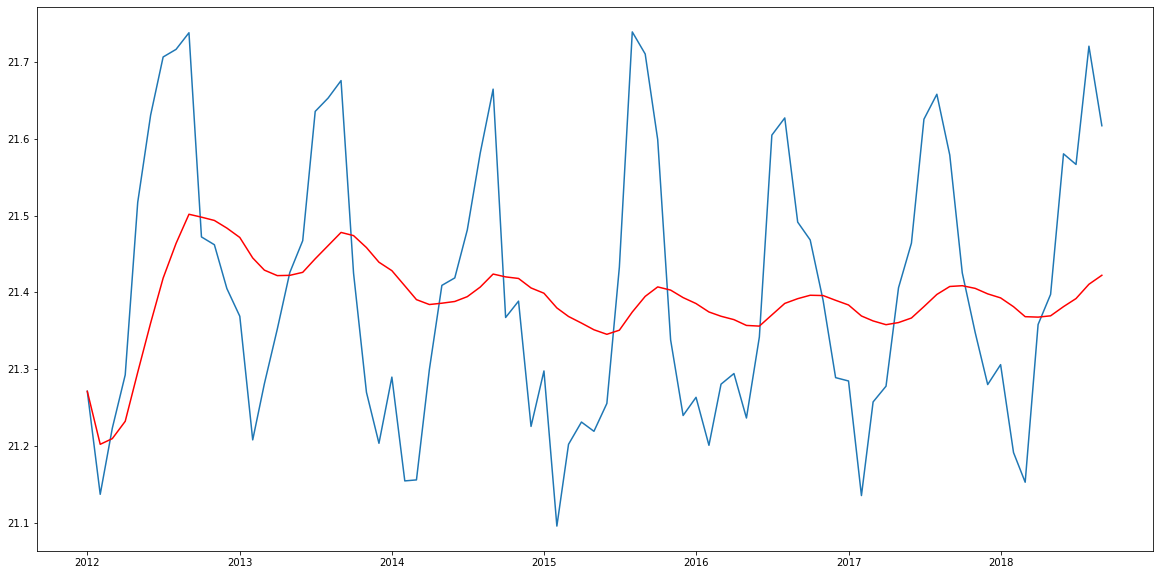

In [13]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='red')

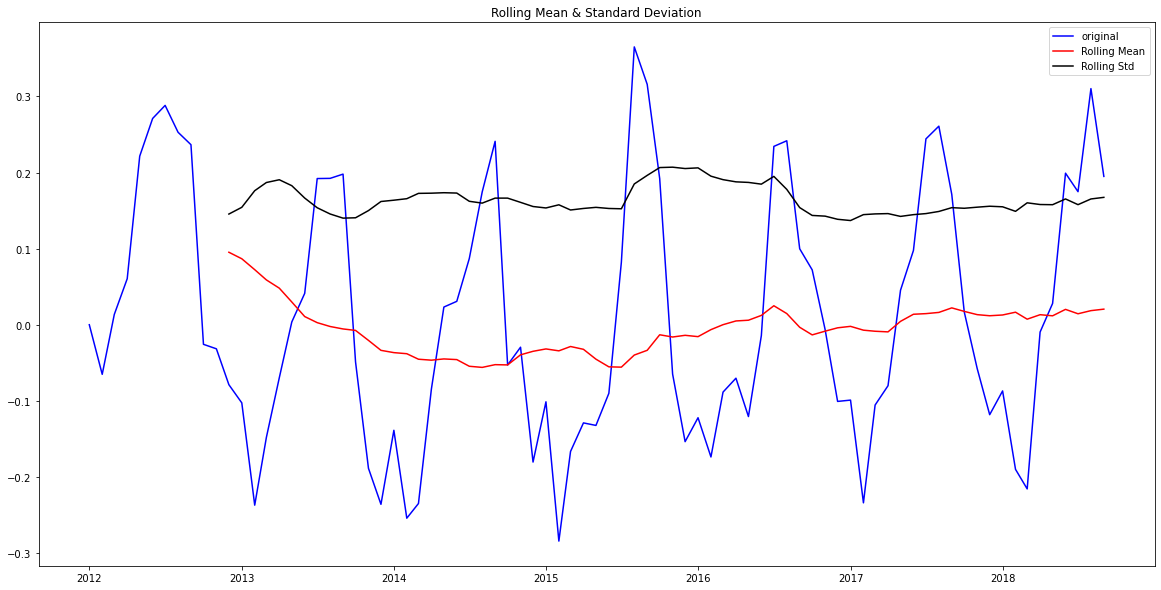

Dickey-Fuller Test: 
Test Statistic          -2.508577
p-value                  0.113401
Lags Used               12.000000
No. of Obs              68.000000
Critical Value (1%)     -3.530399
Critical Value (5%)     -2.905087
Critical Value (10%)    -2.590001
dtype: float64


In [14]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

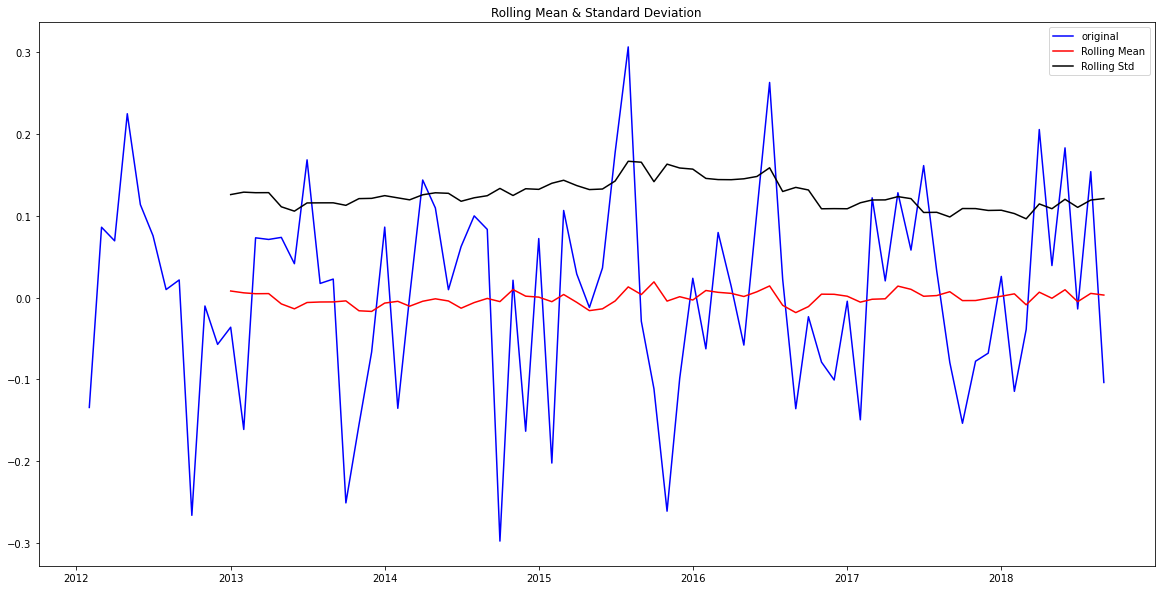

Dickey-Fuller Test: 
Test Statistic         -8.119349e+00
p-value                 1.167421e-12
Lags Used               1.000000e+01
No. of Obs              6.900000e+01
Critical Value (1%)    -3.528890e+00
Critical Value (5%)    -2.904440e+00
Critical Value (10%)   -2.589656e+00
dtype: float64


In [15]:
data_shift=data_log-data_log.shift()

data_shift=data_shift.dropna()
stationarity(data_shift)

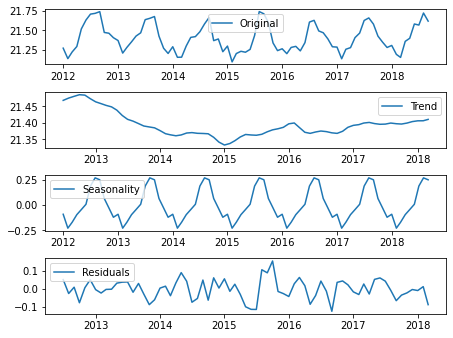

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

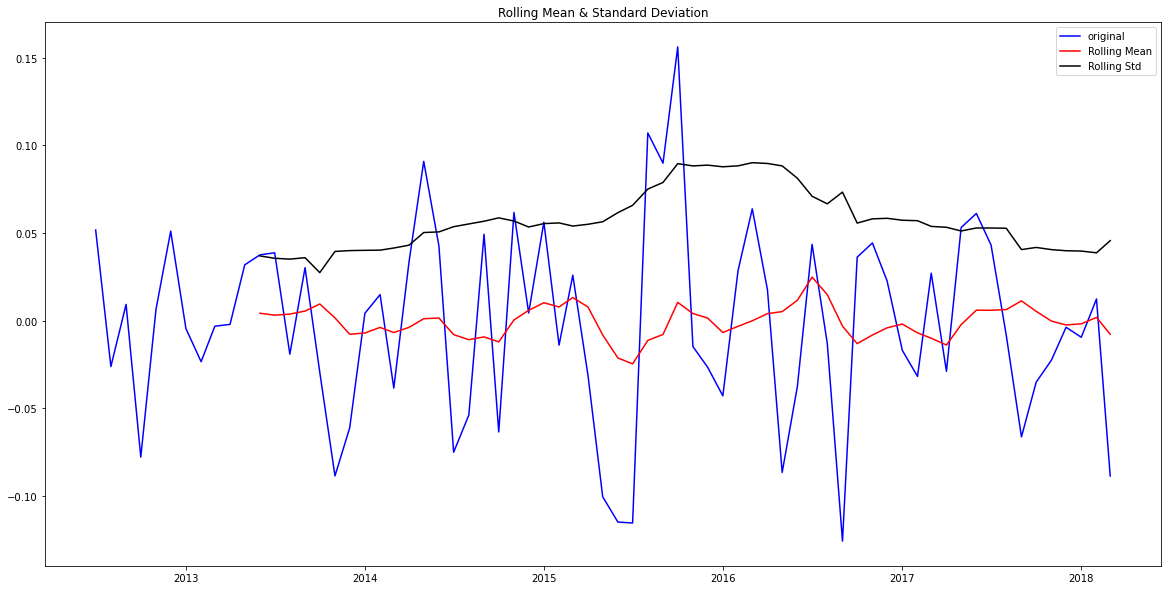

Dickey-Fuller Test: 


KeyError: 'total gallons'

In [17]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function')

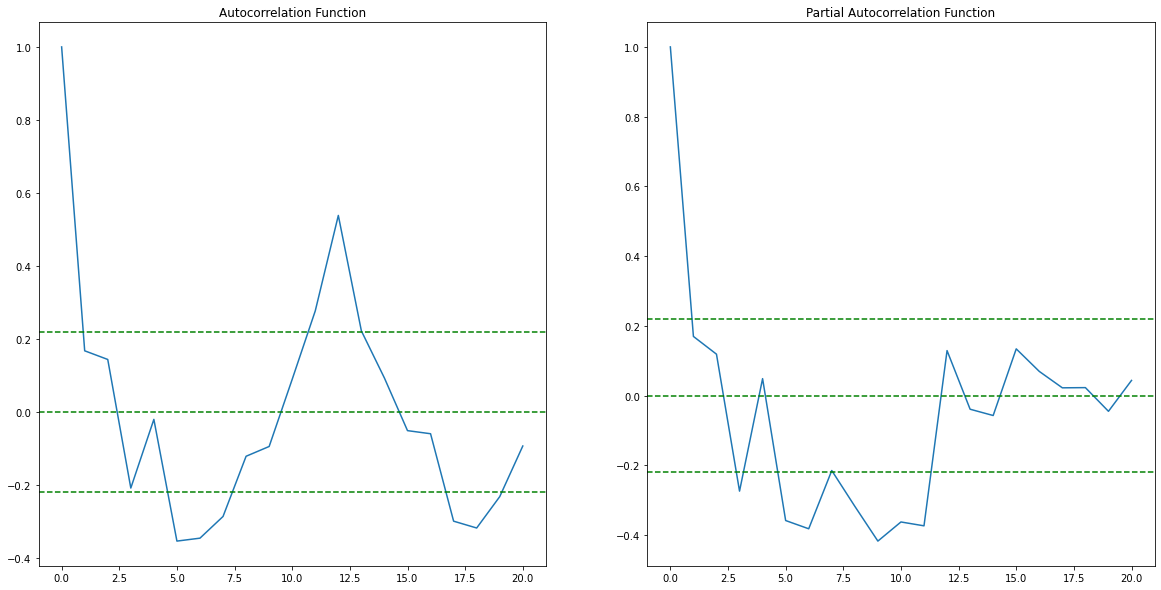

In [18]:
# ARIMA Model
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

plotting ARIMA model


C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


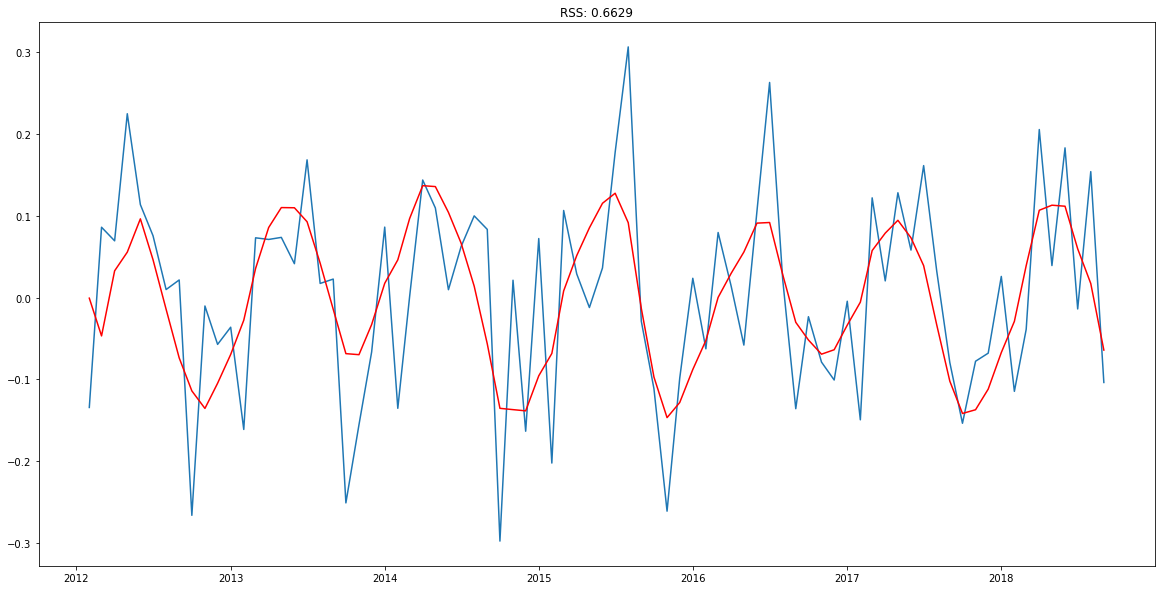

In [19]:
# Arima Model
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['total gallons'])**2))
print('plotting ARIMA model')

In [20]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

months
2012-02-01   -0.000623
2012-03-01   -0.046750
2012-04-01    0.032817
2012-05-01    0.055660
2012-06-01    0.096388
dtype: float64


In [21]:
# convert to cumulative sum
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

months
2012-02-01   -0.000623
2012-03-01   -0.047373
2012-04-01   -0.014556
2012-05-01    0.041104
2012-06-01    0.137492
dtype: float64


In [22]:
predictions_log=pd.Series(data_log['total gallons'], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

months
2012-01-01    21.271101
2012-02-01    21.136246
2012-03-01    21.175608
2012-04-01    21.277925
2012-05-01    21.558482
dtype: float64

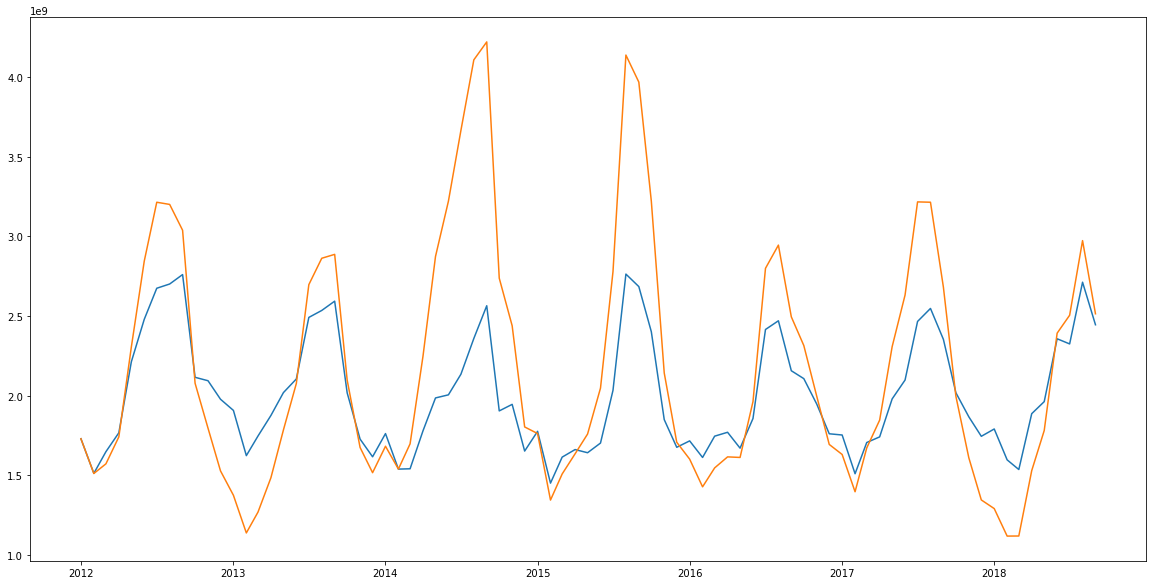

In [23]:

predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

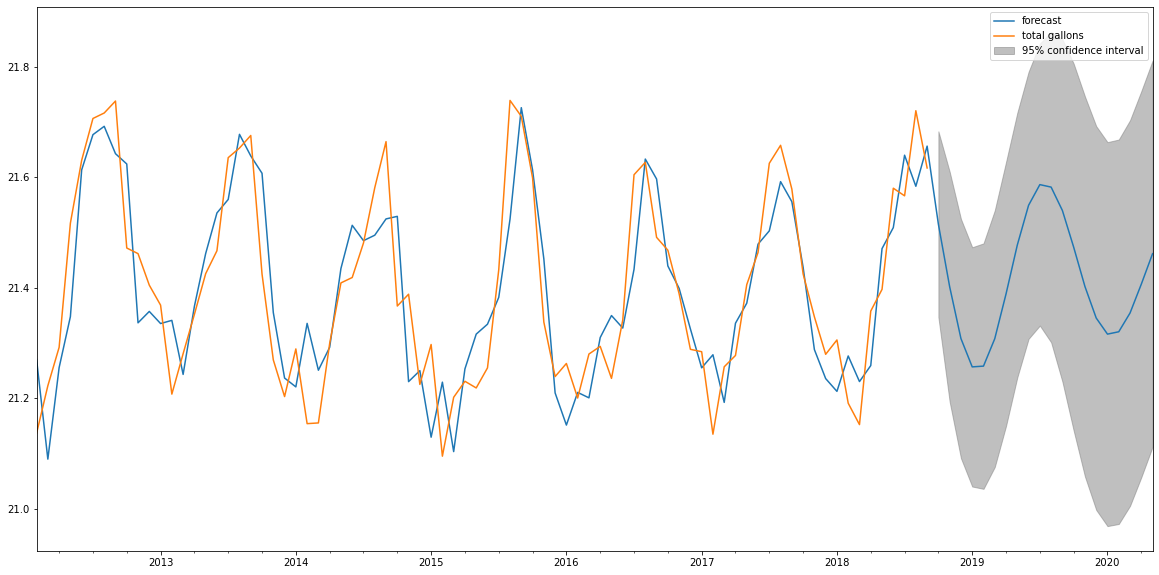

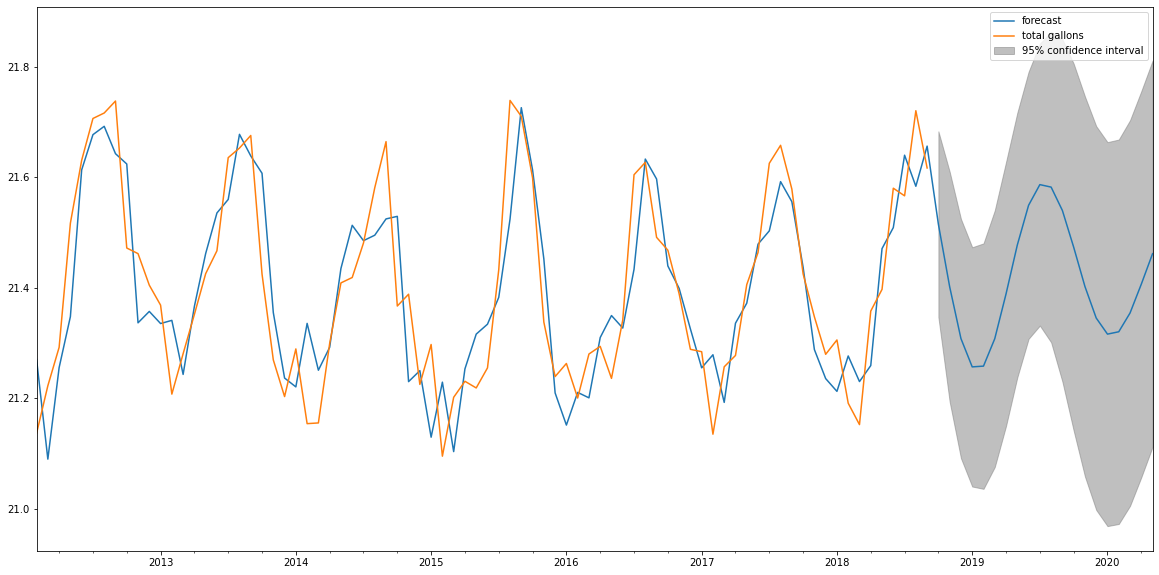

In [24]:

rcParams['figure.figsize']=20,10
results.plot_predict(1,100)

In [25]:
results.forecast(steps=24)

(array([21.51532171, 21.40221445, 21.30843384, 21.25712571, 21.2585065 ,
        21.30812895, 21.38914617, 21.47767956, 21.54964299, 21.58711429,
        21.58260619, 21.54026613, 21.47391642, 21.40268723, 21.3455736 ,
        21.31643296, 21.32071043, 21.35462753, 21.4068653 , 21.46211202,
        21.50540068, 21.52603301, 21.5200851 , 21.49093902]),
 array([0.0858323 , 0.1062424 , 0.11049208, 0.11050627, 0.11336138,
        0.11852991, 0.12187898, 0.12223743, 0.12334241, 0.13022808,
        0.14336062, 0.15810971, 0.16949651, 0.17550369, 0.17725678,
        0.17732555, 0.17755684, 0.17809802, 0.17832102, 0.17836107,
        0.1795109 , 0.18307789, 0.18894951, 0.19548638]),
 array([[21.3470935 , 21.68354992],
        [21.19398318, 21.61044572],
        [21.09187335, 21.52499433],
        [21.0405374 , 21.47371401],
        [21.03632229, 21.48069071],
        [21.0758146 , 21.54044329],
        [21.15026775, 21.62802459],
        [21.23809859, 21.71726052],
        [21.30789631, 21.791

In [26]:
np.exp(x)

NameError: name 'x' is not defined

In [ ]:
# parsing string to a date time type
data['months']=pd.to_datetime(data['months'], infer_datetime_format=True)
data=data.set_index(['months'])